/usr/lib/python2.7/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


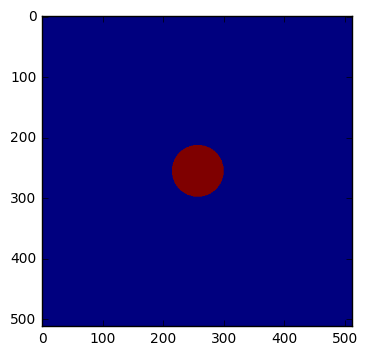

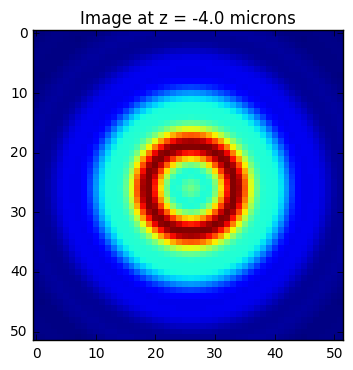

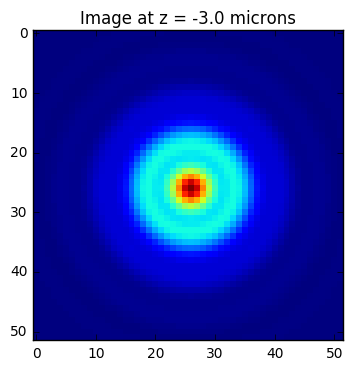

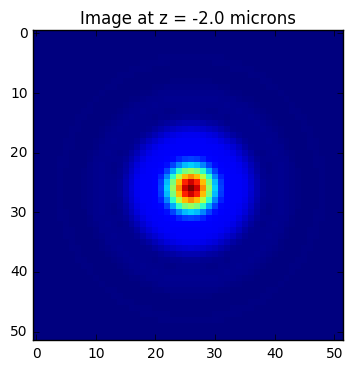

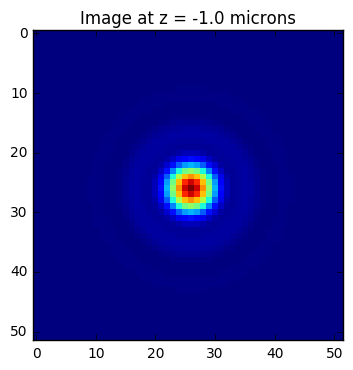

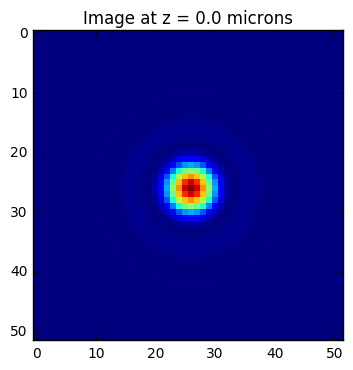

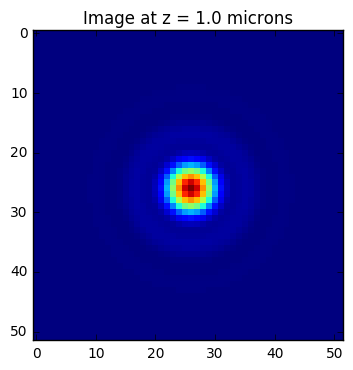

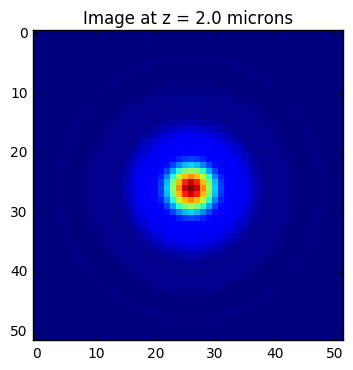

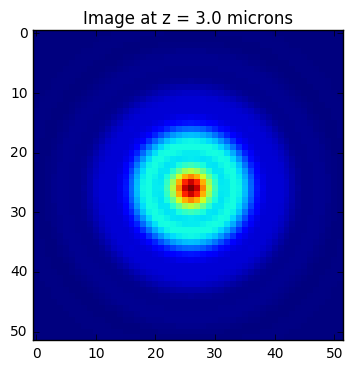

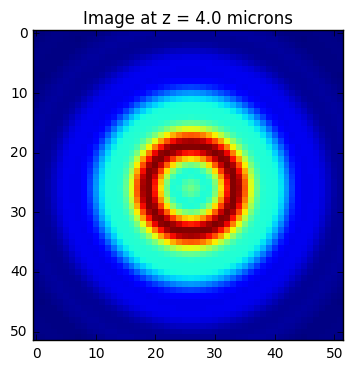

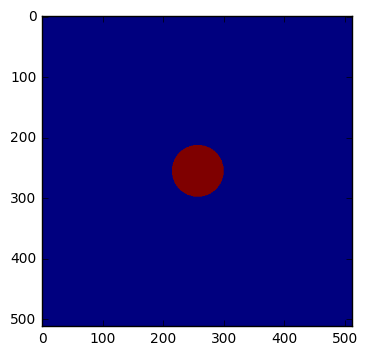

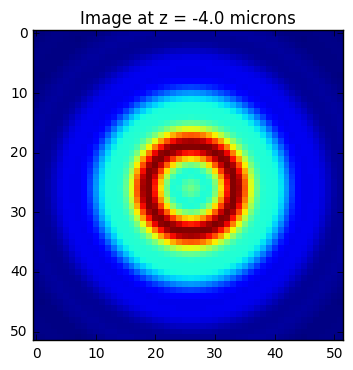

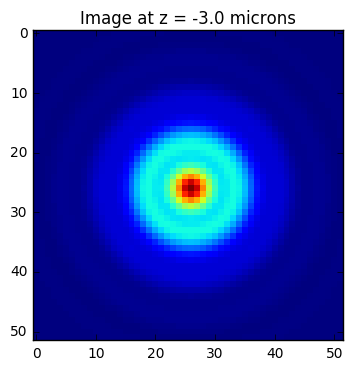

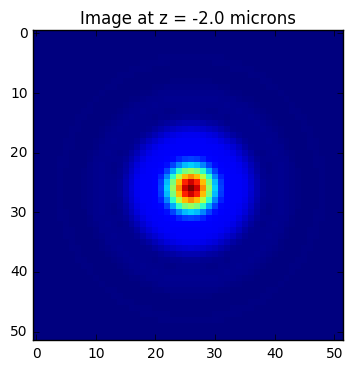

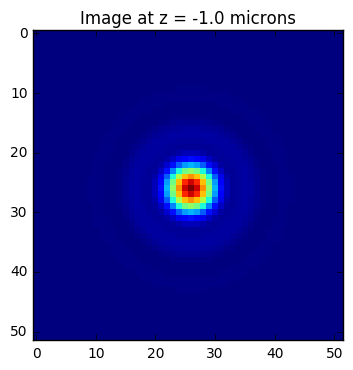

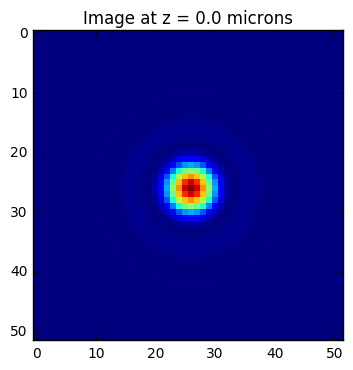

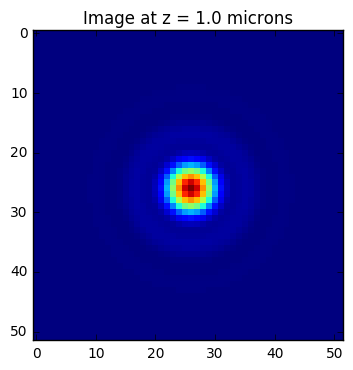

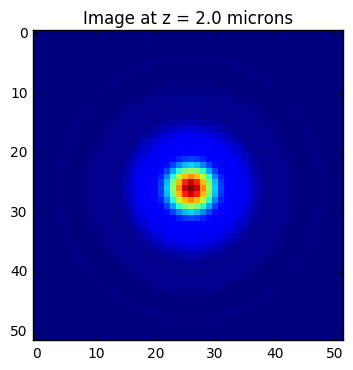

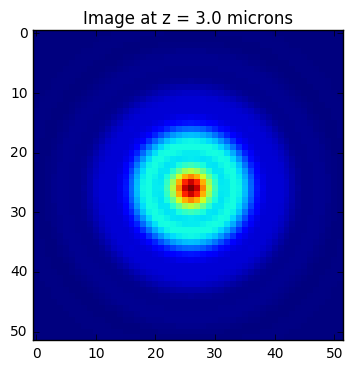

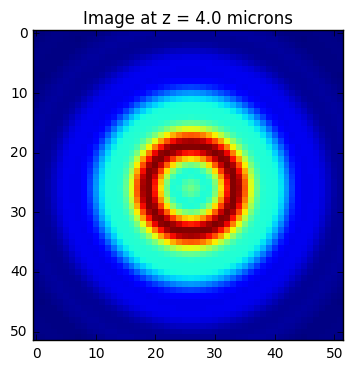

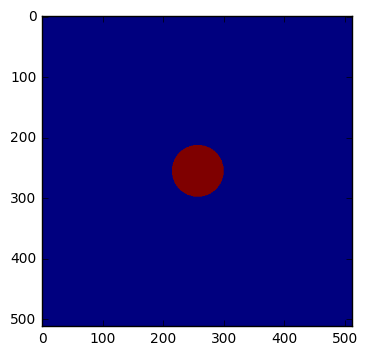

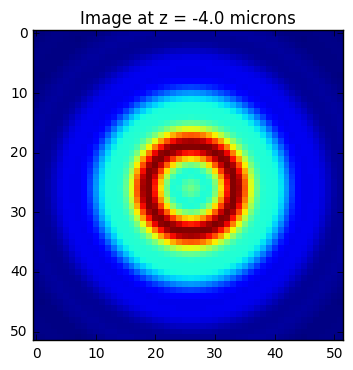

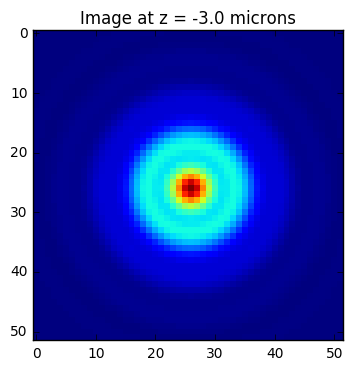

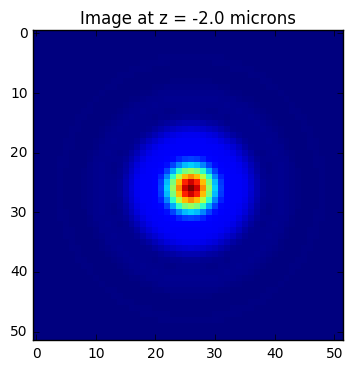

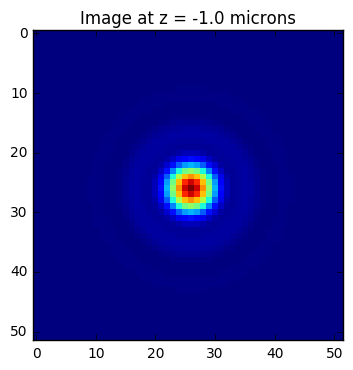

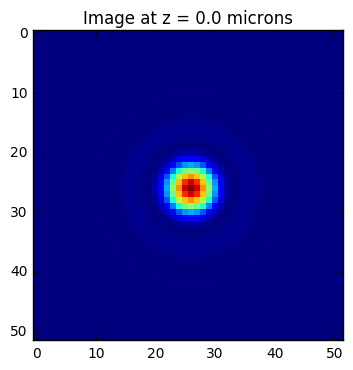

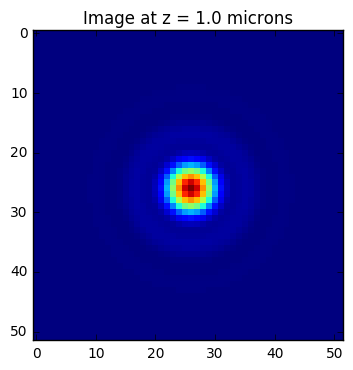

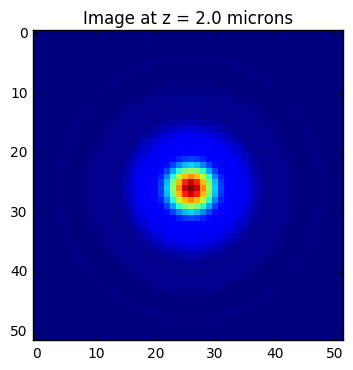

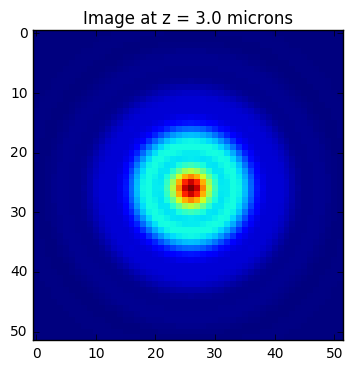

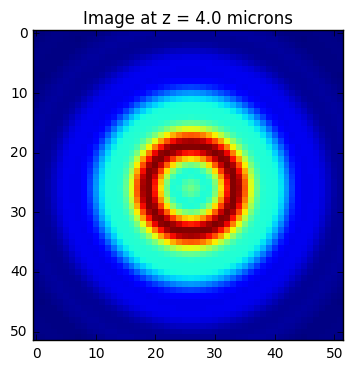

In [4]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 20 19:08:20 2018

@author: vganapa1
"""
import matplotlib.pyplot as plt
import numpy as np

from E30_Resolution import NAfilter, filter_function_NA, create_point, fresnel_prop

Nx = 2**9
Ny = 2**9
wavelength = 600e-9 #[m]
NA = 0.5
dx = 100e-9 #[m]
dy = dx
L = dx*Nx
z = 10e-6 #[m]
crop = 230
z_vec = np.arange(-4,5,1)*(1e-6)


u_0 = create_point(Nx,Ny,0,0)    #This creates a point of light at the origin
H_NA = NAfilter(Nx,L,wavelength,NA)
u_f = filter_function_NA(u_0,H_NA,Nx,incoherent=False)

plt.figure()
plt.imshow(np.abs(np.fft.fftshift(H_NA)))


for z in z_vec:
    u_2 = fresnel_prop(u_f,dx,dy,z,wavelength)

    plt.figure()
    plt.imshow(np.abs(u_2[crop:-crop,crop:-crop])**2, interpolation = 'none')
    plt.title('Image at z = ' + str(z*10**6) + ' microns')   
    plt.show()